Edit Movies! First, mount your google drive!


In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
DRIVE_PATH = '/content/gdrive/My\ Drive/Curb'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/Curb'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [ ]:
%cd Curb
!apt install -y --no-install-recommends ffmpeg
!pip install ffpb

/content/gdrive/.shortcut-targets-by-id/18G5ng6QyXM8IgyHj_VL7EBw0LEpt3YIU/Curb
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
     |████████████████████████████████| 40kB 2.2MB/s 


In [ ]:
import pickle

In [ ]:
scenes = pickle.load(open("scenes.pkl", "rb" ))

In [ ]:
%cd AUDIO/
audio = pickle.load(open("audio_to_scene.pkl", "rb" ))
%cd ..

/content/gdrive/.shortcut-targets-by-id/18G5ng6QyXM8IgyHj_VL7EBw0LEpt3YIU/Curb/AUDIO
/content/gdrive/.shortcut-targets-by-id/18G5ng6QyXM8IgyHj_VL7EBw0LEpt3YIU/Curb


In [ ]:
#For fun, take audio files, search through all of them, find the matches, and name them appropriately.

In [ ]:
#!mkdir VIDEOAUDIO
#!for f in *.MOV; do yes | ffpb -i $f -q:a 0 -map a VIDEOAUDIO/${f%.MOV}.MP3; done
#!for f in *.MP4; do yes | ffpb -i $f -q:a 0 -map a VIDEOAUDIO/${f%.MOV}.MP3; done

In [ ]:
#We've got AUDIO, and VIDEOAUDIO

In [ ]:
#Now, to import it all into a compressed format

In [ ]:
pip install wavio

In [ ]:
import numpy as np
import wavio
import matplotlib.pyplot as plt
from IPython.display import Audio
from numpy.fft import fft, ifft
%matplotlib inline

In [ ]:
%ls AUDIO

200822-T001.WAV  200822-T023.WAV  200822-T045.WAV  200823-T009.WAV
200822-T002.WAV  200822-T024.WAV  200822-T046.WAV  200823-T010.WAV
200822-T003.WAV  200822-T025.WAV  200822-T047.WAV  200823-T011.WAV
200822-T004.WAV  200822-T026.WAV  200822-T048.WAV  200823-T012.WAV
200822-T005.WAV  200822-T027.WAV  200822-T049.WAV  200823-T013.WAV
200822-T006.WAV  200822-T028.WAV  200822-T050.WAV  200823-T014.WAV
200822-T007.WAV  200822-T029.WAV  200822-T051.WAV  200823-T015.WAV
200822-T008.WAV  200822-T030.WAV  200822-T052.WAV  200823-T016.WAV
200822-T009.WAV  200822-T031.WAV  200822-T053.WAV  200823-T017.WAV
200822-T010.WAV  200822-T032.WAV  200822-T054.WAV  200823-T018.WAV
200822-T011.WAV  200822-T033.WAV  200822-T055.WAV  200823-T019.WAV
200822-T012.WAV  200822-T034.WAV  200822-T056.WAV  200823-T020.WAV
200822-T013.WAV  200822-T035.WAV  200822-T057.WAV  200823-T021.WAV
200822-T014.WAV  200822-T036.WAV  200822-T058.WAV  200823-T022.WAV
200822-T015.WAV  200822-T037.WAV  200823-T001.WAV  200823-T023

In [ ]:
data = wavio.read('AUDIO/200822-T002.WAV')


In [ ]:
Audio(data.data[:100*data.rate].T, rate= data.rate)

Output hidden; open in https://colab.research.google.com to view.

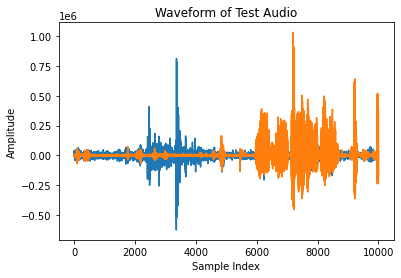

In [ ]:
plt.figure()
plt.plot(data.data[:500000:50])
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Waveform of Test Audio')
plt.show()

In [ ]:
#Great! Now to auto sync all audio files???? What a task!!

In [ ]:
data.data[:500000:50][:,0].shape

(10000,)

In [ ]:
np.fft.fft(data.data[:500000:50][:,0])

array([-2651162.             +0.j        ,
        1723179.47915667+155044.41703311j,
       -1694320.78593028-747977.94757116j, ...,
        1157448.3782862 -918585.87707757j,
       -1694320.78593028+747977.94757116j,
        1723179.47915666-155044.41703311j])

In [ ]:
y = data.data[:500000:50][:,0]
N = len(y)
Fs = data.rate

In [ ]:
Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT function from numpy

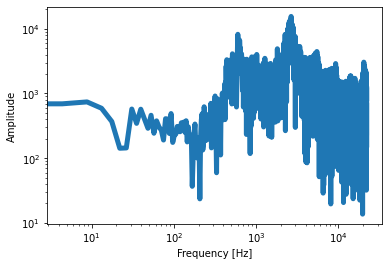

In [ ]:

Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N; # frequency vector

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=5)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

In [ ]:
from scipy import signal

In [ ]:
y = data.data[:50*data.rate][:,0]
x = data.data[40*data.rate:90*data.rate][:,1]

In [ ]:
x.shape == y.shape

True

In [ ]:
autocorr = signal.fftconvolve(y, x, mode='full')

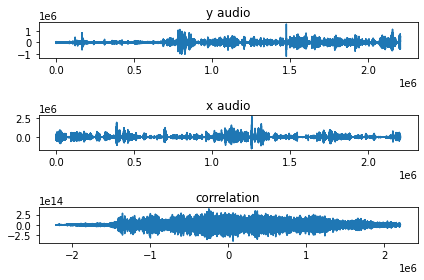

In [ ]:
fig, (ax_y, ax_x, ax_mag) = plt.subplots(3, 1)
ax_y.plot(y)
ax_y.set_title('y audio')
ax_x.plot(x)
ax_x.set_title('x audio')
ax_mag.plot(np.arange(-len(y)+1,len(y)), autocorr)
ax_mag.set_title('correlation')
fig.tight_layout()
fig.show()

In [ ]:
retval = []
for i in range(0,data.rate*50,data.rate*10):
  retval.append([])
  for j in range(0,data.rate*50,data.rate*10):
    slide = np.sum(np.abs(signal.fftconvolve(y[i:i+data.rate*10], x[j:j+data.rate*10], mode='full')))
    #slide = np.max(signal.fftconvolve(y[i:i+data.rate], x[j:j+data.rate], mode='full'))
    #slide = np.all(y[i:i+data.rate]== x[j:j+data.rate])
    retval[-1].append(slide)

In [ ]:
import pandas as pd

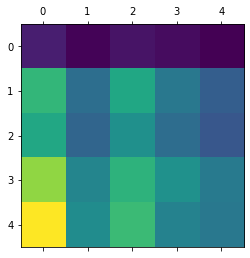

In [ ]:
plt.matshow(np.array(retval))

In [ ]:
#Ok, this seems to work acceptably well as a metric for syncing, but it's probably pretty unstable.
#Should write a function that says, basically, if it were these 2 clips, where would the match be, and
# gives a score for the matchup


In [ ]:
reference = data.data[:100*data.rate][:,0]
slide = data.data[80*data.rate:90*data.rate][:,1]

In [ ]:
!mkdir GIFOFTRANSFORM

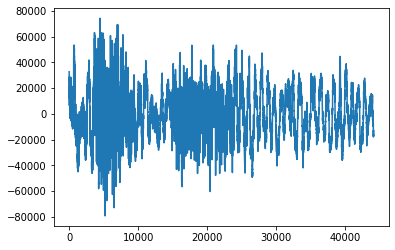

In [ ]:
plt.plot(reference[0*data.rate:(0+1)*data.rate])

In [ ]:
from scipy import fftpack

In [ ]:
X = fftpack.fft(reference[0*data.rate:(0+1)*data.rate])
freqs = fftpack.fftfreq(data.rate) * data.rate

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


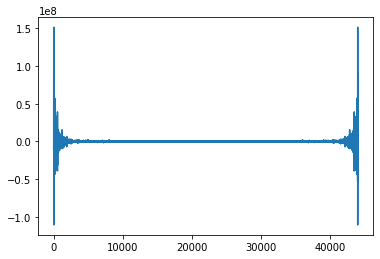

In [ ]:
 plt.plot(
      np.fft.fft(reference[0*data.rate:(0+1)*data.rate], n=2*10*data.rate)
      )

In [ ]:
for i in range(100):
  plt.plot(
      np.fft.fft(reference[i*data.rate:(i+10)*data.rate], n=2*10*data.rate)
      );
  plt.savefig("GIFOFTRANSFORM/"+str(i).zfill(3)+".png");
  plt.clf();

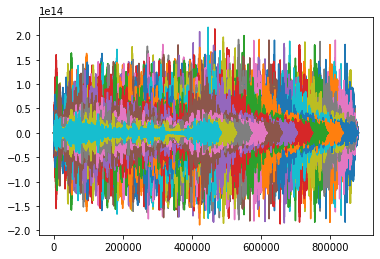

In [ ]:
for i in range(100):
  plt.plot(signal.fftconvolve(slide, reference[i*data.rate:(i+10)*data.rate], mode='full'));
  plt.savefig("GIFOFTRANSFORM/"+str(i).zfill(3)+".png");
  plt.clf();

In [ ]:
speed = 60
repeat = "0"

In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

In [ ]:
!convert -delay {speed} -loop {repeat} GIFOFTRANSFORM/*.png GIFOFTRANSFORM/full.gif


In [ ]:
from IPython.display import Image

In [ ]:
Image(open('GIFOFTRANSFORM/full.gif','rb').read())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!rm -r Visualizations/{placeName}/map*.png

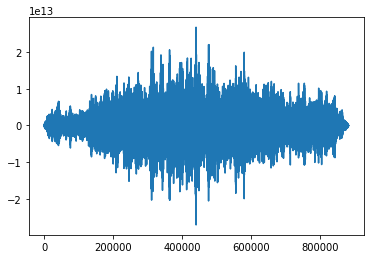

In [ ]:
plt.plot(signal.fftconvolve(slide, reference[0*data.rate:(0+10)*data.rate], mode='full'))